In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [6]:
# loading the dataset
data = pd.read_csv('/content/winequality-red.csv')

data.shape

(1599, 12)

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#checking for missing values
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


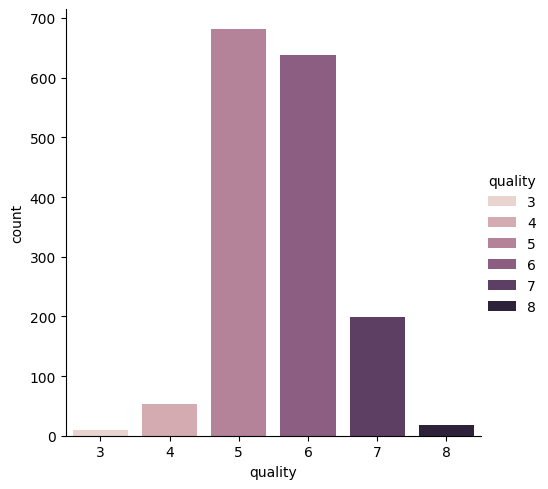

In [10]:
#number of entries for each quality value


#catplot: create categorical plots

sns.catplot(x='quality', data = data, kind = 'count', hue='quality')

#**Data** **Visualization**

<Axes: xlabel='quality', ylabel='volatile acidity'>

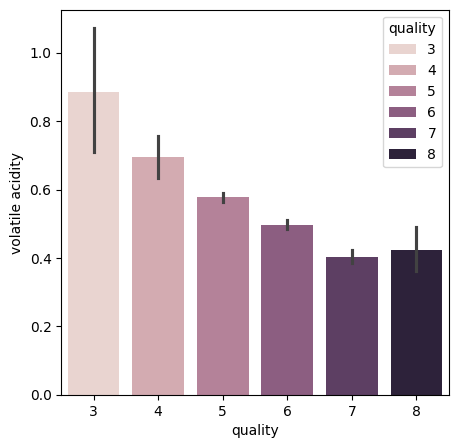

In [11]:
#fixed acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = data, hue='quality')

<Axes: xlabel='quality', ylabel='citric acid'>

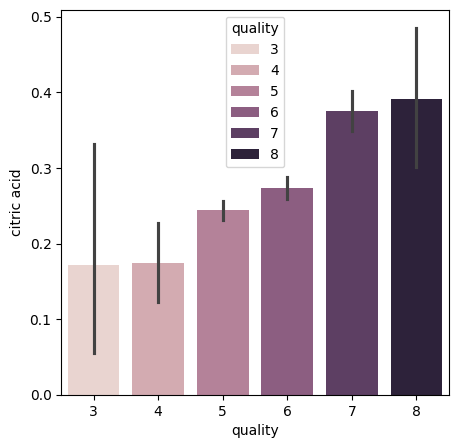

In [12]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = data, hue='quality')

<Axes: xlabel='quality', ylabel='volatile acidity'>

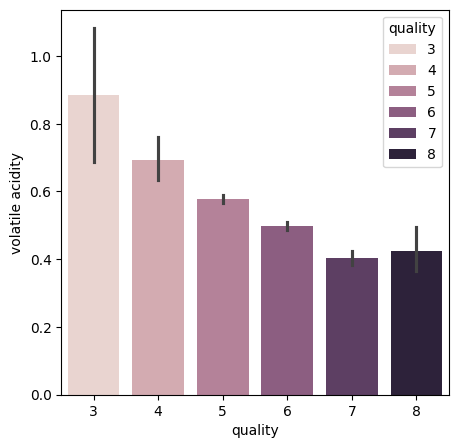

In [13]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=data,hue='quality')

<Axes: xlabel='quality', ylabel='alcohol'>

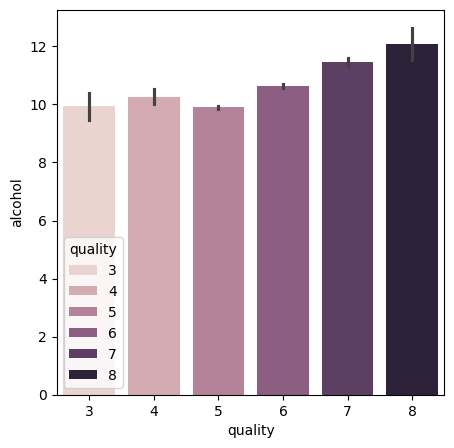

In [27]:
#alcohol vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=data,hue='quality')

<Axes: xlabel='quality', ylabel='pH'>

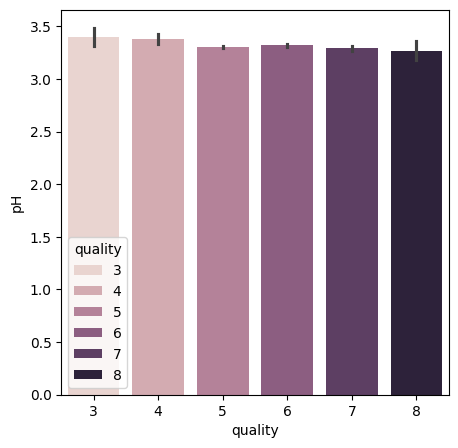

In [28]:
#ph vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=data,hue='quality')

pH also inversely proportion

<Axes: xlabel='quality', ylabel='residual sugar'>

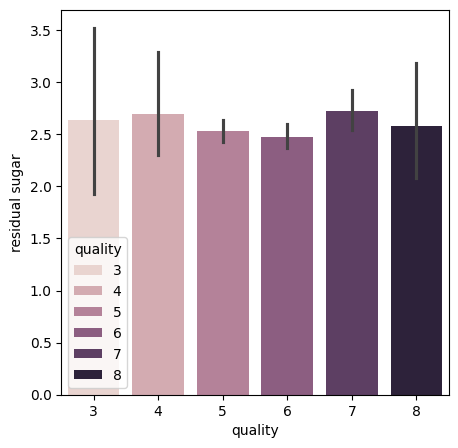

In [29]:
#residual sugar vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=data,hue='quality')

#**Finding Correlation between attributes**

In [14]:
correlation = data.corr()

<Axes: >

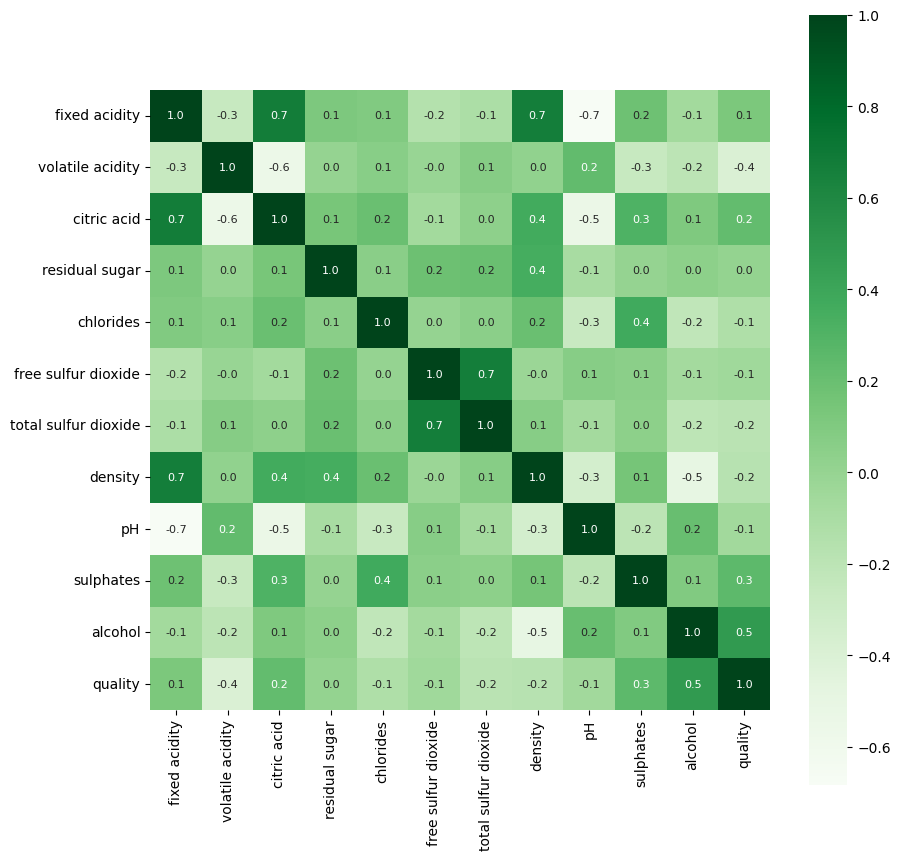

In [15]:
#constructing a heatmap to understand the correlation between the attributes (columns)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,  annot_kws={'size':8},cmap='Greens' )

#Data Preprocessing

In [16]:
#Separating the dataset and the result columns
X = data.drop('quality', axis=1)

In [17]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

#Label Binarization

In [18]:
#A lambda function in Python is a small, anonymous
#function that can have multiple inputs but only one expression.
# It is used when you need a quick, one-time-use function.


#Lambda functions are widely used in data science for
#quick transformations, filtering, and applying functions
#without writing full functions.

Y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [19]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


#Train And Test Split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [21]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


#Model Training: Random Forest Classifier

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(X_train, Y_train)

RandomForestClassifier()

#Model Evaluation: Accuracy Score

In [34]:
#accuracy on train data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [35]:
print("Accuracy on test data is:",training_data_accuracy)

Accuracy on test data is: 1.0


In [24]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy on test data is: ', test_data_accuracy)

Accuracy on test data is:  0.9125


# Building a Predictive System

In [26]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0]==1:
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
